<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/SSDModelOnCityPersonDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SSD (Single Shot MultiBox Detector) Implementation on CityPerson Dataset

### Step 1: Extract and read the datasets

In [112]:
# import required libraries
import os
import zipfile
import json
import random
from collections import Counter
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
# from tqdm import tqdm
# import torch
# import torchvision
# from torchvision import transforms, datasets, models
# from torch.utils.data import Dataset, DataLoader
# import torch.nn as nn
# import torch.optim as optim
# from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
# from torchvision.models.detection.ssd import SSD

In [117]:
# Dataset zip files path from Google Drive
#gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'
gtBbox = '/content/drive/MyDrive/CityPersonDataset/gtBbox_cityPersons_trainval.zip'

#gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'
gtBbox_ExtPath = '/content/CityPersonDataset/gtBbox_cityPersons_trainval'

In [118]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
#extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)
extract_zip(gtBbox, gtBbox_ExtPath)

In [116]:
# %rm -rf /content/CityPersonDataset

In [119]:
# List the extracted content from both datasets
#gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)
gtBbox_Files = os.listdir(gtBbox_ExtPath)

#gtFine_Files,
gtFinepano_Files, gtBbox_Files

(['license.txt', 'README_panopticParts.md', 'gtFinePanopticParts'],
 ['license.txt', 'gtBboxCityPersons', 'README_cityPersons'])

In [120]:
# Path to core folder
#gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')
gtBbox_CorePath = os.path.join(gtBbox_ExtPath, 'gtBboxCityPersons')

# List driectories inside core folders
#gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []
gtBbox_Dirs = os.listdir(gtBbox_CorePath) if os.path.exists(gtBbox_CorePath) else []

#gtFine_Dirs,
gtFinePano_Dirs, gtBbox_Dirs

(['train', 'val'], ['train', 'val'])

In [121]:
# Define the subdirectories
subdirs = gtBbox_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
#gtFine_CityFolders = {}
gtFinePano_CityFolders = {}
gtBbox_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    #gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []
    gtBbox_CityFolders[subdir] = os.listdir(os.path.join(gtBbox_CorePath, subdir)) if subdir in gtBbox_Dirs else []

# Output the first few files for each subdirectory
#gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}
gtBbox_CityFolders_Preview = {key: value[:] for key, value in gtBbox_CityFolders.items()}

#gtFine_CityFolders_Preview,
gtFinePano_CityFolders_Preview, gtBbox_CityFolders_Preview

({'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']},
 {'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']})

In [122]:
# Count the distribution of file types in a given directory
def count_file_types(directory):
    if not os.path.exists(directory):
      print(f"Error: Directory '{directory}' not found.")
      return None

    file_type_counts = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            file_type_counts[ext] += 1
    return file_type_counts

# # File type distribution for gtFine dataset
# print("File Type Distribution in gtFine Dataset:")
# gtFine_file_types = count_file_types(gtFine_CorePath)
# print(pd.DataFrame(gtFine_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtFinePanopticParts dataset
print("\nFile Type Distribution in gtFinePanopticParts Dataset:")
gtFinePano_file_types = count_file_types(gtFinePano_CorePath)
print(pd.DataFrame(gtFinePano_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtBboxCityPersons dataset
print("\nFile Type Distribution in gtBboxCityPersons Dataset:")
gtBbox_file_types = count_file_types(gtBbox_CorePath)
print(pd.DataFrame(gtBbox_file_types.items(), columns=["File Type", "Count"]))


File Type Distribution in gtFinePanopticParts Dataset:
  File Type  Count
0      .tif   3475

File Type Distribution in gtBboxCityPersons Dataset:
  File Type  Count
0     .json   3475


In [125]:
# Function to convert files with .tif format to .jpg format
def convert_and_copy_images(src_dir, dest_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Walk through all folders and subfolders in the source directory
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            # Process only .tif files
            if file.lower().endswith('.tif'):
                # Full path to the .tif image
                file_path = os.path.join(root, file)

                # Open the .tif image and convert it to .jpg
                with Image.open(file_path) as img:
                    # Change the file extension to .jpg
                    new_file_name = os.path.splitext(file)[0] + '.jpg'
                    new_file_path = os.path.join(dest_dir, new_file_name)

                    # Convert and save as .jpg in the destination directory
                    img.convert("RGB").save(new_file_path, "JPEG")
# Example usage
source_folder = '/content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train'
destination_folder = '/content/gtFinePanopticParts_trainval/gtFinePanopticParts/train/images'
convert_and_copy_images(source_folder, destination_folder)

In [ ]:
def convert_and_copy_images(src_dir, dest_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Walk through all folders and subfolders in the source directory
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            # Process only .tif files
            if file.lower().endswith('.tif'):
                # Full path to the .tif image
                file_path = os.path.join(root, file)

                # Open the .tif image and convert it to .jpg
                with Image.open(file_path) as img:
                    # Change the file extension to .jpg
                    new_file_name = os.path.splitext(file)[0] + '.jpg'
                    new_file_path = os.path.join(dest_dir, new_file_name)

                    # Convert and save as .jpg in the destination directory
                    img.convert("RGB").save(new_file_path, "JPEG")
# Example usage
source_folder = '/kaggle/input/city-persone/gtFinePanopticParts_trainval/gtFinePanopticParts/val'
destination_folder = '/kaggle/working/gtFinePanopticParts/val/images'
convert_and_copy_images(source_folder, destination_folder)

In [124]:
#%rm -rf /content/gtBbox_cityPersons_trainval

######################################################################
######################################################################
######################################################################

In [90]:
# # Dataset zip files path from Google Drive
# #gtFine_Org = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
# gtFinePanopticParts_Org = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'
# gtBbox_Org = '/content/drive/MyDrive/CityPersonDataset/gtBbox_cityPersons_trainval.zip'

# #gtFine_Org_ExtPath = '/content/CityPersonDataset_Org/gtFine_trainvaltest'
# gtFinePano_ChangedFormat_ExtPath = '/content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval'
# gtBbox_ChangedFormat_ExtPath = '/content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval'

In [113]:
# %rm -rf /content/CityPersonDataset_ChangedFormat

In [92]:
# Extract both datasets zip files
# extract_zip(gtFine_Org, gtFine_ExtPath)
extract_zip(gtFinePanopticParts_Org, gtFinePano_ChangedFormat_ExtPath)
extract_zip(gtBbox_Org, gtBbox_ChangedFormat_ExtPath)

In [93]:
# Path to core folder
# gtFine_Org_CorePath = os.path.join(gtFine_Org_ExtPath, 'gtFine')
gtFinePano_ChangedFormat_CorePath = os.path.join(gtFinePano_ChangedFormat_ExtPath, 'gtFinePanopticParts')
gtBbox_ChangedFormat_CorePath = os.path.join(gtBbox_ChangedFormat_ExtPath, 'gtBboxCityPersons')

In [94]:
gtFinePano_ChangedFormat_CorePath, gtBbox_ChangedFormat_CorePath

('/content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval/gtFinePanopticParts',
 '/content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval/gtBboxCityPersons')

In [95]:
# List driectories inside core folders
#gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_ChangedFormat_Dirs = os.listdir(gtFinePano_ChangedFormat_CorePath) if os.path.exists(gtFinePano_ChangedFormat_CorePath) else []
gtBbox_ChangedFormat_Dirs = os.listdir(gtBbox_ChangedFormat_CorePath) if os.path.exists(gtBbox_ChangedFormat_CorePath) else []

#gtFine_Dirs,
gtFinePano_ChangedFormat_Dirs, gtBbox_ChangedFormat_Dirs

(['train', 'val'], ['train', 'val'])

In [96]:
##############################################
# # File type distribution for gtFine dataset
# print("File Type Distribution in gtFine Dataset:")
# gtFine_file_types = count_file_types(gtFine_CorePath)
# print(pd.DataFrame(gtFine_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtFinePanopticParts dataset
print("\nFile Type Distribution in gtFinePanopticParts Dataset:")
gtFinePano_ChangedFormat_file_types = count_file_types(gtFinePano_ChangedFormat_CorePath)
print(pd.DataFrame(gtFinePano_ChangedFormat_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtBboxCityPersons dataset
print("\nFile Type Distribution in gtBboxCityPersons Dataset:")
gtBbox_ChangedFormat_file_types = count_file_types(gtBbox_ChangedFormat_CorePath)
print(pd.DataFrame(gtBbox_ChangedFormat_file_types.items(), columns=["File Type", "Count"]))


File Type Distribution in gtFinePanopticParts Dataset:
  File Type  Count
0      .tif   3475

File Type Distribution in gtBboxCityPersons Dataset:
  File Type  Count
0     .json   3475


In [97]:
# Define the subdirectories
subdirs = gtBbox_ChangedFormat_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
#gtFine_CityFolders = {}
gtFinePano_ChangedFormat_CityFolders = {}
gtBbox_ChangedFormat_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    #gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_ChangedFormat_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_ChangedFormat_CorePath, subdir)) if subdir in gtFinePano_Dirs else []
    gtBbox_ChangedFormat_CityFolders[subdir] = os.listdir(os.path.join(gtBbox_ChangedFormat_CorePath, subdir)) if subdir in gtBbox_Dirs else []

# Output the first few files for each subdirectory
#gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_ChangedFormat_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_ChangedFormat_CityFolders.items()}
gtBbox_ChangedFormat_CityFolders_Preview = {key: value[:] for key, value in gtBbox_ChangedFormat_CityFolders.items()}

#gtFine_CityFolders_Preview,
gtFinePano_ChangedFormat_CityFolders_Preview, gtBbox_ChangedFormat_CityFolders_Preview

({'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']},
 {'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']})

In [98]:
# # Convert .json to .txt
# def convert_json_to_txt(directory):
#     for root, _, files in tqdm(os.walk(directory), desc="Converting JSON to TXT"):
#         for file in files:
#             if file.endswith(".json"):
#                 json_path = os.path.join(root, file)
#                 txt_path = os.path.join(root, file.replace(".json", ".txt"))

#                 with open(json_path, "r", encoding="utf-8") as json_file:
#                     data = json.load(json_file)

#                 with open(txt_path, "w", encoding="utf-8") as txt_file:
#                     txt_file.write(json.dumps(data, indent=4))  # Save JSON content in readable format

#                 os.remove(json_path)  # Remove original JSON file

# # Run conversions
# convert_json_to_txt(gtBbox_ChangedFormat_CorePath)

In [99]:
# Function to convert .tif to .jpg
def convert_tif_to_jpg(directory):
    for root, _, files in tqdm(os.walk(directory), desc="Converting TIF to JPG"):
        for file in files:
            if file.endswith(".tif"):
                tif_path = os.path.join(root, file)
                jpg_path = os.path.join(root, file.replace(".tif", ".jpg"))

                try:
                    # Open image with PIL
                    image = Image.open(tif_path)

                    # Convert to RGB (if needed) and save as JPG
                    image.convert("RGB").save(jpg_path, "JPEG", quality=95)
                    os.remove(tif_path)  # Remove the original .tif file
                except Exception as e:
                    print(f"Failed to convert: {tif_path}, Error: {e}")

# Run conversion
convert_tif_to_jpg(gtFinePano_ChangedFormat_CorePath)

Converting TIF to JPG: 24it [03:54,  9.75s/it]


In [100]:
# Parse a JSON annotation file function
def parse_json_file(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    print("Keys in JSON file:", data.keys())
    return data

# Create a list of all JSON files from gtFine
def get_json_files(directory):
    json_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    return json_files

gtBbox_json_files = get_json_files(gtBbox_ChangedFormat_CorePath)
#gtBbox_json_files

Randomly Selected JSON file: /content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/darmstadt/darmstadt_000021_000019_gtBboxCityPersons.json
Keys in JSON file: dict_keys(['imgHeight', 'imgWidth', 'objects'])
Corresponding JPG file: /content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval/gtFinePanopticParts/train/darmstadt/darmstadt_000021_000019_gtFinePanopticParts.jpg


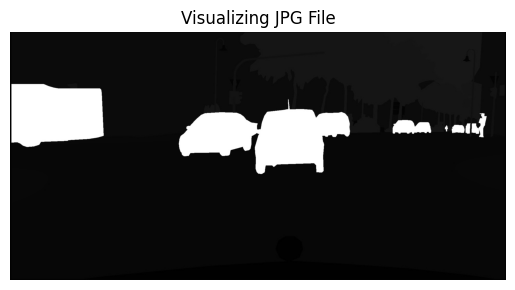

In [102]:
# Randomly select a JSON file from gtBbox
if not gtBbox_json_files:
    print("No JSON files found in gtFine dataset.")
else:
    sample_json = random.choice(gtBbox_json_files)
    print(f"Randomly Selected JSON file: {sample_json}")
    sample_gtBbox_data = parse_json_file(sample_json)

    # Derive the corresponding .tif file path in gtFinePanopticParts
    json_filename = os.path.basename(sample_json)
    jpg_filename = json_filename.replace('_gtBboxCityPersons.json', '_gtFinePanopticParts.jpg')

    jpg_file_path = None
    for root, _, files in os.walk(gtFinePano_ChangedFormat_CorePath):
        for file in files:
            if file == jpg_filename:
                jpg_file_path = os.path.join(root, file)
                break
        if jpg_file_path:
            break

    # Visualize the .jpg file if it exists
    if jpg_file_path:
        print(f"Corresponding JPG file: {jpg_file_path}")
        jpg_image = Image.open(jpg_file_path)
        plt.imshow(jpg_image)
        plt.title("Visualizing JPG File")
        plt.axis('off')  # Turn off axis for better visualization
        plt.show()
    else:
        print(f"No corresponding JPG file found for {sample_json}")

In [103]:
# # Parse a TXT annotation file function
# def parse_txt_file(txt_path):
#     with open(txt_path, 'r') as file:
#         data = file.readlines()
#     print("Contents of TXT file:")
#     for line in data[:5]:  # Print first 10 lines for preview
#         print(line.strip())
#     return data

# # Create a list of all TXT files from gtBbox
# def get_txt_files(directory):
#     txt_files = []
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             if file.endswith('.txt'):
#                 txt_files.append(os.path.join(root, file))
#     return txt_files

# gtBbox_txt_files = get_txt_files(gtBbox_ChangedFormat_CorePath)
# #gtBbox_txt_files

In [104]:
# # Randomly select a TXT file from gtBbox
# if not gtBbox_txt_files:
#     print("No TXT files found in gtBbox dataset.")
# else:
#     sample_txt = random.choice(gtBbox_txt_files)
#     print(f"Randomly Selected TXT file: {sample_txt}")
#     sample_gtBbox_data = parse_txt_file(sample_txt)

#     # Derive the corresponding .jpg file path in gtFinePanopticParts
#     txt_filename = os.path.basename(sample_txt)
#     jpg_filename = txt_filename.replace('_gtBboxCityPersons.txt', '_gtFinePanopticParts.jpg')

#     jpg_file_path = None
#     for root, _, files in os.walk(gtFinePano_ChangedFormat_CorePath):
#         for file in files:
#             if file == jpg_filename:
#                 jpg_file_path = os.path.join(root, file)
#                 break
#         if jpg_file_path:
#             break

#     # Visualize the .jpg file if it exists
#     if jpg_file_path:
#         print(f"Corresponding JPG file: {jpg_file_path}")
#         jpg_image = Image.open(jpg_file_path)
#         plt.imshow(jpg_image)
#         plt.title("Visualizing JPG File")
#         plt.axis('off')  # Turn off axis for better visualization
#         plt.show()
#     else:
#         print(f"No corresponding JPG file found for {sample_txt}")

In [105]:
# Define dataset class for CityPersons
class CityPersonsDataset(Dataset):
    def __init__(self, image_root, annotation_root, transform=None):
        self.image_root = image_root
        self.annotation_root = annotation_root
        self.transform = transform
        self.image_paths = []
        self.annotation_paths = []

        # Walk through city-wise subdirectories
        for subset in ["train", "val"]:
            subset_image_path = os.path.join(image_root, subset)
            subset_annotation_path = os.path.join(annotation_root, subset)

            for city in os.listdir(subset_image_path):
                city_image_dir = os.path.join(subset_image_path, city)
                city_annotation_dir = os.path.join(subset_annotation_path, city)

                if os.path.isdir(city_image_dir):
                    for file in os.listdir(city_image_dir):
                        if file.endswith("_gtFinePanopticParts.jpg"):
                            image_path = os.path.join(city_image_dir, file)
                            annotation_path = os.path.join(city_annotation_dir, file.replace("_gtFinePanopticParts.jpg", "_gtBboxCityPersons.json"))

                            if os.path.exists(annotation_path):
                                self.image_paths.append(image_path)
                                self.annotation_paths.append(annotation_path)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        with open(self.annotation_paths[idx], 'r') as f:
            annotation = json.load(f)

        # Extract bounding boxes and labels
        boxes = []
        labels = []
        for obj in annotation["objects"]:
            if obj["label"] == "pedestrian":
                x, y, w, h = obj["bbox"]
                boxes.append([x, y, x + w, y + h])
                labels.append(1)  # Label 1 for pedestrian

        target = {"boxes": torch.tensor(boxes, dtype=torch.float32),
                  "labels": torch.tensor(labels, dtype=torch.int64)}

        if self.transform:
            image = self.transform(image)

        return image, target

In [106]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

In [107]:
# Load dataset
image_root = "/content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval/gtFinePanopticParts"
annotation_root = "/content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval/gtBboxCityPersons"
dataset = CityPersonsDataset(image_root, annotation_root, transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

In [111]:
import torchvision.models.detection as detection

# Load the SSD model with pretrained weights
model = detection.ssd300_vgg16(weights=SSD300_VGG16_Weights.DEFAULT)

# Modify the classification head for two classes: Background + Pedestrian
num_classes = 2
in_features = model.head.classification_head.classifier[0].in_features  # Get input features
model.head.classification_head.classifier = torch.nn.Linear(in_features, num_classes)  # Modify classifier

print(model)

AttributeError: 'SSDClassificationHead' object has no attribute 'classifier'